In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import warnings

[*********************100%***********************]  1 of 1 completed


C:\Users\gupil\AppData\Local\Temp\ipykernel_1480\3371105384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['Squared Return'] = nifty_data['Return']**2


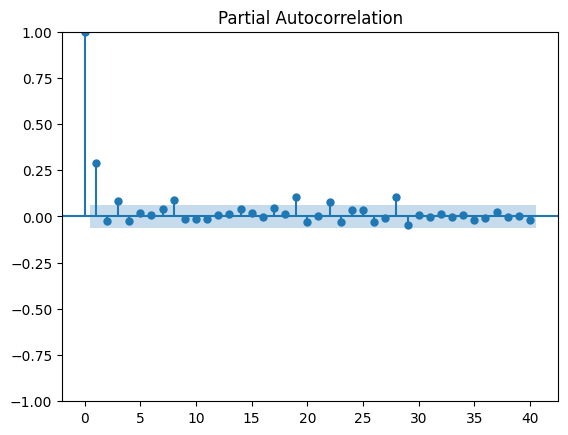

In [2]:
nifty_data = yf.download('^NSEI', start='2020-07-01', end='2024-07-01')
nifty_data['Return'] = nifty_data['Adj Close'].pct_change()
nifty_data = nifty_data.dropna()
nifty_data['Squared Return'] = nifty_data['Return']**2
plot_pacf(nifty_data['Squared Return'], lags=40)
plt.show()

In [15]:

ps=range(1,4)
qs=range(1,4)


results = pd.DataFrame(columns=['p', 'q', 'AIC', 'BIC'])

# Loop over p and q values to fit GARCH models
for p in ps:
    for q in qs:
        model = arch_model(nifty_data['Return'], vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')
        aic = model_fit.aic
        print(aic)

-6537.805862670755
-6545.645120121984
-6545.985693940127
-6521.086026885536
-6528.181185225038
-6527.874394283609
-6509.15079557709
-6518.8077182028055
-6521.863996853174


C:\Users\gupil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.786e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\gupil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.786e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning

min is at (1,3)

In [21]:
garchmodel = arch_model(nifty_data['Return'], vol='Garch', p=1, q=3,rescale=False).fit()
# Extract the conditional volatility
nifty_data['Volatility'] = garchmodel.conditional_volatility
nifty_data['Benchmark Vol']=nifty_data['Squared Return'].shift(-1)
nifty_data.head()
rmse = np.sqrt(((nifty_data['Volatility'] - nifty_data['Benchmark Vol'])**2).mean())
rmse

Iteration:      1,   Func. Count:      8,   Neg. LLF: 107123486.93520473
Iteration:      2,   Func. Count:     22,   Neg. LLF: 4726236825.421516
Iteration:      3,   Func. Count:     38,   Neg. LLF: 949805781.7221733
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3278.9928469700635
            Iterations: 3
            Function evaluations: 48
            Gradient evaluations: 3


C:\Users\gupil\AppData\Local\Temp\ipykernel_1480\254644883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['Volatility'] = garchmodel.conditional_volatility
C:\Users\gupil\AppData\Local\Temp\ipykernel_1480\254644883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['Benchmark Vol']=nifty_data['Squared Return'].shift(-1)


0.009236324529265209

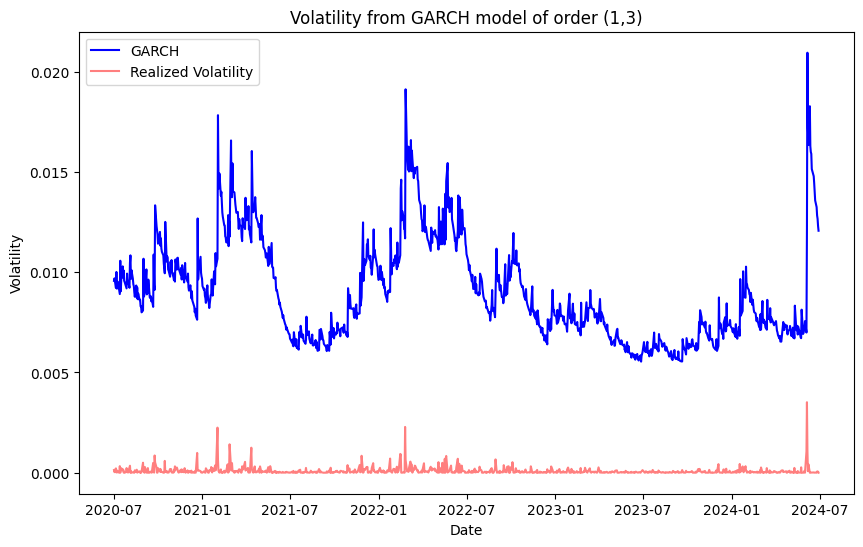

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(nifty_data.index, nifty_data['Volatility'], color='blue', label='GARCH')
plt.plot(nifty_data.index, nifty_data['Squared Return'], color='red', alpha=0.5, label='Realized Volatility')
plt.title('Volatility from GARCH model of order (1,3)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()